This FuXiang Chen's homework. I getting rid of many explanation on the class so that it's is easier for grading.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import os
if not os.path.exists('solutions'):
    os.makedirs('solutions')
else:
    print('Directory "solutions" already exists. Skipping creation.')
!wget -P solutions https://raw.githubusercontent.com/williamgilpin/cphy/main/hw/solutions/sandpile.py

Directory "solutions" already exists. Skipping creation.


'wget' ���O�����Υ~���R�O�B�i���檺�{���Χ妸�ɡC


In [39]:
class AbelianSandpile:
    def __init__(self, n=100, random_state=None):
        self.n = n
        np.random.seed(random_state) # Set the random seed
        self.grid = np.random.choice([0, 1, 2, 3], size=(n, n))
        self.modgrid = np.zeros((n+2,n+2))
        self.history =[self.grid.copy()] # Why did we need to copy the grid?

    def step(self):
        sandx,sandy =np.random.randint(1,self.n,2)
        self.modgrid[1:-1,1:-1] = self.grid.copy()
        self.modgrid[sandx,sandy] +=1
        
        #print(self.grid)
        def collapse(x,y):
            if (self.modgrid[x,y]>3):
                self.modgrid[x,y] = self.modgrid[x,y]-4
        
                self.modgrid[x,y+1] +=1
                self.modgrid[x+1,y] +=1
                self.modgrid[x,y-1] +=1
                self.modgrid[x-1,y] +=1

                self.modgrid [0,:] *= 0
                self.modgrid [:,0] *= 0
                self.modgrid [-1,:] *= 0
                self.modgrid [:,-1] *= 0
                collapse(x,y+1)
                collapse(x,y-1)
                collapse(x+1,y)
                collapse(x-1,y)
            else:
                #print("equalibrium")
                return 0
        if (self.modgrid[sandx,sandy]>3):
            #print(self.modgrid)
            collapse(sandx,sandy)
        #print("drop sand")
        self.grid = self.modgrid[1:-1,1:-1].copy()
        self.history.append(self.grid.copy())
        
    
 
    @staticmethod
    def check_difference(grid1, grid2):
        """Check the total number of different sites between two grids"""
        return np.sum(grid1 != grid2)
    def simulate(self, n_step):
        for i in range (n_step):
            self.step()

Text(0.5, 1.0, 'Avalanche activity in most recent timesteps')

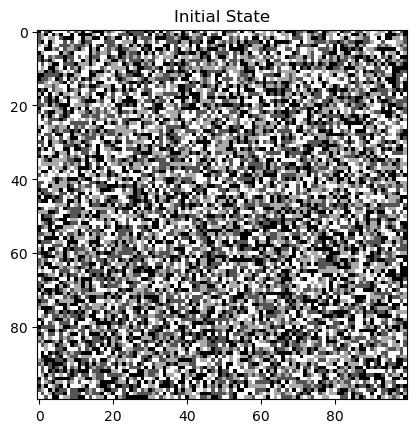

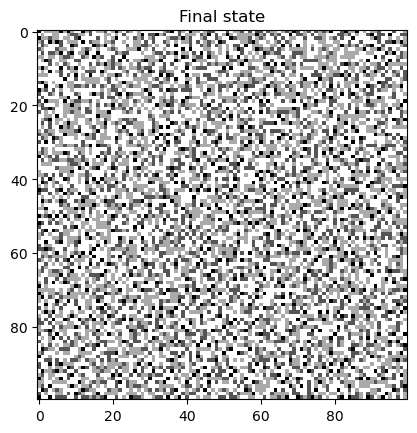

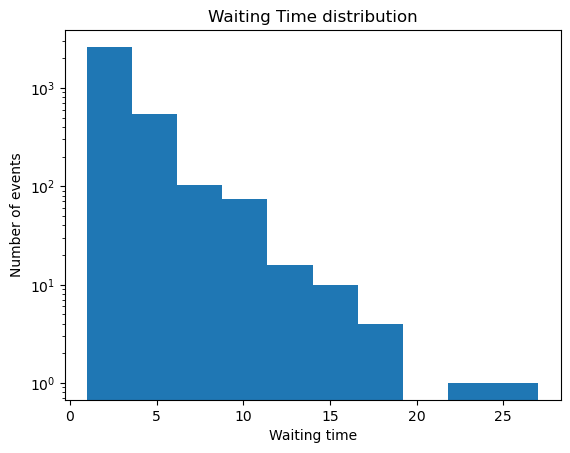

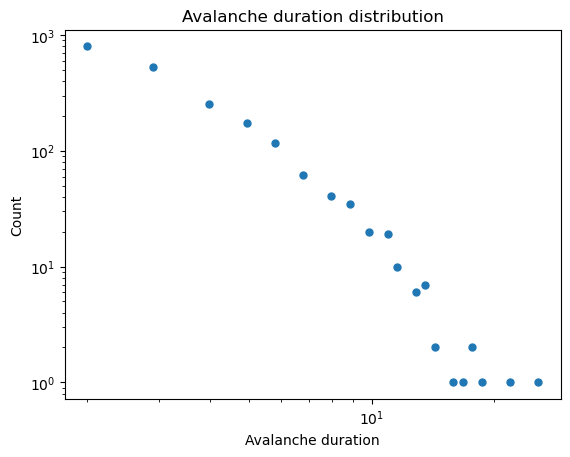

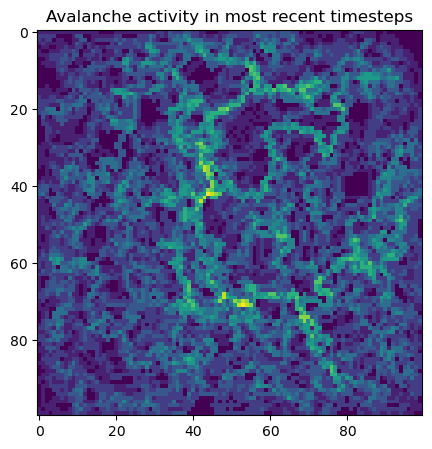

In [40]:
## Import William's solution from answer key
# from solutions.sandpile import AbelianSandpileIterative as AbelianSandpile
# from solutions.sandpile import AbelianSandpileBFS as AbelianSandpile
# from solutions.sandpile import AbelianSandpileDFS as AbelianSandpile


# Run sandpile simulation
model = AbelianSandpile(n=100, random_state=0)

plt.figure()
plt.imshow(model.grid, cmap='gray')
plt.title("Initial State")

model.simulate(10000)
plt.figure()
plt.imshow(model.grid, cmap='gray')
plt.title("Final state")




# Compute the pairwise difference between all observed snapshots. This command uses list
# comprehension, a zip generator, and argument unpacking in order to perform this task
# concisely.
all_events =  [model.check_difference(*states) for states in zip(model.history[:-1], model.history[1:])]
# remove transients before the self-organized critical state is reached
all_events = all_events[1000:]
# index each timestep by timepoint
all_events = list(enumerate(all_events))
# remove cases where an avalanche did not occur
all_avalanches = [x for x in all_events if x[1] > 1]
all_avalanche_times = [item[0] for item in all_avalanches]
all_avalanche_sizes = [item[1] for item in all_avalanches]
all_avalanche_durations = [event1 - event0 for event0, event1 in zip(all_avalanche_times[:-1], all_avalanche_times[1:])]


## Waiting time distribution
waiting_times = np.diff(np.array(all_avalanche_times))
plt.figure()
plt.semilogy()
plt.hist(waiting_times)
plt.title('Waiting Time distribution')
plt.xlabel('Waiting time')
plt.ylabel('Number of events')

## Duration distribution
log_bins = np.logspace(np.log10(2), np.log10(np.max(all_avalanche_durations)), 50) # logarithmic bins for histogram
vals, bins = np.histogram(all_avalanche_durations, bins=log_bins)
plt.figure()
plt.loglog(bins[:-1], vals, '.', markersize=10)
plt.title('Avalanche duration distribution')
plt.xlabel('Avalanche duration')
plt.ylabel('Count')

## Visualize activity of the avalanches
# Make an array storing all pairwise differences between the lattice at successive
# timepoints
all_diffs = np.abs(np.diff(np.array(model.history), axis=0))
all_diffs[all_diffs > 0] = 1
all_diffs = all_diffs[np.sum(all_diffs, axis=(1, 2)) > 1] # Filter to only keep big events
most_recent_events = np.sum(all_diffs[-100:], axis=0)
plt.figure(figsize=(5, 5))
plt.imshow(most_recent_events)
plt.title("Avalanche activity in most recent timesteps")

//////Answer here////

Q1 is coded

Q2 at Figure 4 about the time distribtution showing alpha is a constant for inverse propotion of ln(1/T) vs log (count). It seems somhow linear and the reference alpha should be ~0.42 in 2D case.

Q3 Based on the recussive function the depth determine my time so for N size lattice. The 0->sqrt(N) will be the depth ,and sqrt(N) times for worst case thus "N*A(a coefficient)" will be the runtime in a N dimensional matrix. The depth searching gives me sqrt(N)*A memory usage at worst case for temperal memory ussage in each iteration.

Q4 Due to the size is limited, the boundary will dissipate my event. Thus when the larger event would like to happen due to the limit size effect, it will cause some iregular. 


The following is for prb2.

In [50]:
class PercolationSimulation:

    def __init__(self, n=100, p=0.5, grid=None, random_state=None):


        self.random_state = random_state # the random seed

        if grid is None:
            self.n = n
            self.p = p
            self.grid = np.zeros((n, n))
            self._initialize_grid()
        else:
            assert len(np.unique(np.ravel(grid))) <= 2, "Grid must only contain 0s and 1s"
            self.grid = grid.astype(int)
            # override numbers if grid is provided
            self.n = grid.shape[0]
            self.p = 1 - np.mean(grid)


        self.grid_filled = np.copy(self.grid)

    def _initialize_grid(self):
        
        np.random.seed(self.random_state)
        self.grid = np.random.choice([1, 0], size=(self.n, self.n), p=[1 - self.p, self.p])
        self.grid_filled = np.copy(self.grid)


    def _flow_recursive(self, x, y):

        
        ####### YOUR CODE HERE  #######################################################
        if x < 0 or x >= self.n:
            return None
        if y < 0 or y >= self.n:
            return None
        if self.grid[x, y] == 0:
            return None
        if self.grid_filled[x, y] == 2:
            return None
        self.grid_filled[x, y] = 2
        self._flow_recursive(x + 1, y)
        self._flow_recursive(x - 1, y)
        self._flow_recursive(x, y + 1)
        self._flow_recursive(x, y - 1)
        ###############################################################################
    '''
    def _poll_neighbors(self, x, y):
        """
        Check whether there is a filled site adjacent to a site at coordinates i, j in 
        self.grid_filled. Respects boundary conditions.
        """

        ####### YOUR CODE HERE  #######################################################
        top = self.grid_filled[max(x - 1, 0), y] == 2
        right = self.grid_filled[max(x, 0), min(y + 1, self.n - 1)] == 2
        left = self.grid_filled[max(x, 0), max(y - 1, 0)] == 2
        bottom = self.grid_filled[min(x + 1, self.n - 1), y] == 2

        return any([top, left, right, bottom])
        ###############################################################################
    '''

    def percolate(self):
        
        ###############################################################################
        self._initialize_grid()
        for i in range(1,self.n):    
            self._flow_recursive(0,i)
        # return True if any site is full
        return np.any(self.grid_filled[-1] == 2) 

        ###############################################################################



True
True
False


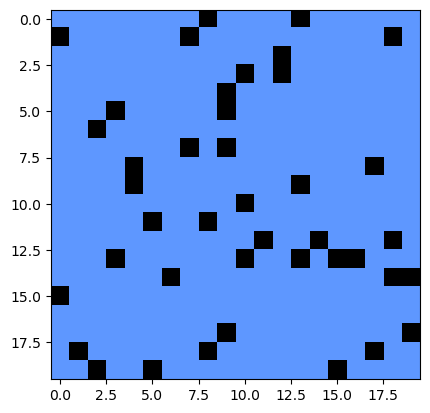

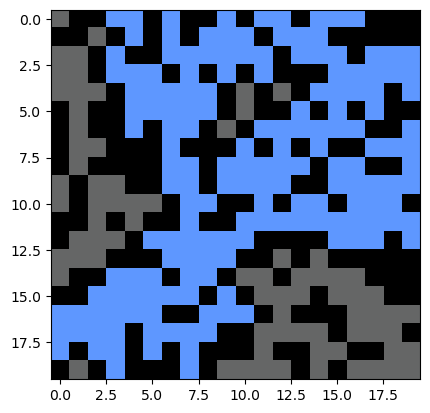

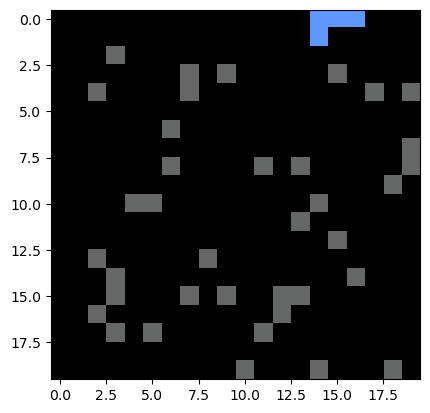

In [48]:
from matplotlib.colors import LinearSegmentedColormap
def plot_percolation(mat):
    """
    Plots a percolation matrix, where 0 indicates a blocked site, 1 indicates an empty 
    site, and 2 indicates a filled site
    """
    cvals  = [0, 1, 2]
    colors = [(0, 0, 0), (0.4, 0.4, 0.4), (0.372549, 0.596078, 1)]

    norm = plt.Normalize(min(cvals), max(cvals))
    tuples = list(zip(map(norm,cvals), colors))
    cmap = LinearSegmentedColormap.from_list("", tuples)
    plt.imshow(mat, cmap=cmap, vmin=0, vmax=2)


model = PercolationSimulation(n=20, random_state=0, p=0.1)
print(model.percolate())
plt.figure()
plot_percolation(model.grid_filled)

model = PercolationSimulation(n=20, random_state=0, p=0.4)
print(model.percolate())
plt.figure()
plot_percolation(model.grid_filled)


model = PercolationSimulation(n=20, random_state=0, p=0.9)
print(model.percolate())
plt.figure()
plot_percolation(model.grid_filled)

Running replicate simulations for p = 0.0
Running replicate simulations for p = 0.041666666666666664
Running replicate simulations for p = 0.08333333333333333
Running replicate simulations for p = 0.125
Running replicate simulations for p = 0.16666666666666666
Running replicate simulations for p = 0.20833333333333331
Running replicate simulations for p = 0.25
Running replicate simulations for p = 0.29166666666666663
Running replicate simulations for p = 0.3333333333333333
Running replicate simulations for p = 0.375
Running replicate simulations for p = 0.41666666666666663
Running replicate simulations for p = 0.4583333333333333
Running replicate simulations for p = 0.5
Running replicate simulations for p = 0.5416666666666666
Running replicate simulations for p = 0.5833333333333333
Running replicate simulations for p = 0.625
Running replicate simulations for p = 0.6666666666666666
Running replicate simulations for p = 0.7083333333333333
Running replicate simulations for p = 0.75
Running

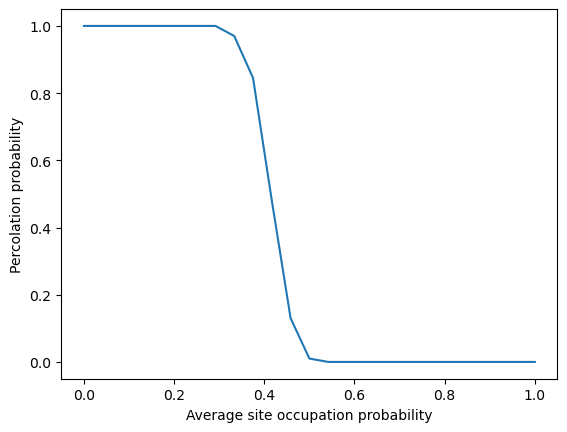

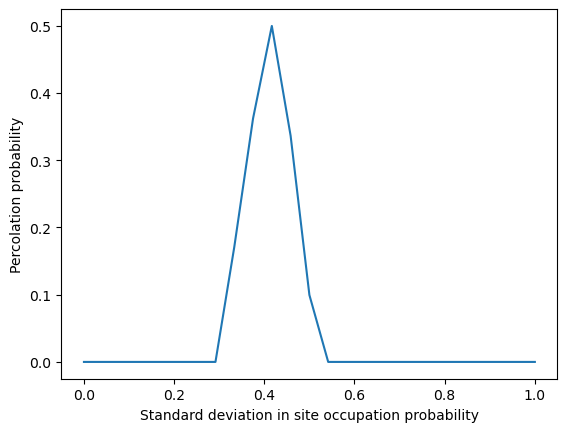

Finished simulation 0
Finished simulation 500
Finished simulation 1000
Finished simulation 1500
Finished simulation 2000
Finished simulation 2500
Finished simulation 3000
Finished simulation 3500
Finished simulation 4000
Finished simulation 4500


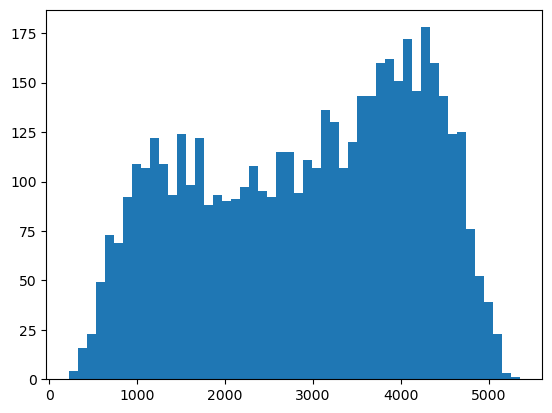

In [51]:

# Import William's solution
#from solutions.percolation import PercolationSimulation

pvals = np.linspace(0, 1, 25) # control parameter for percolation phase transition
n_reps = 200 # number of times to repeat the simulation for each p value

all_percolations = list()
for p in pvals:
    print("Running replicate simulations for p = {}".format(p), flush=True)
    all_replicates = list()
    for i in range(n_reps):
        # Initialize the model
        model = PercolationSimulation(30, p=p)
        all_replicates.append(model.percolate())
    all_percolations.append(all_replicates)

plt.figure()
plt.plot(pvals, np.mean(np.array(all_percolations), axis=1))
plt.xlabel('Average site occupation probability')
plt.ylabel('Percolation probability')

plt.figure()
plt.plot(pvals, np.std(np.array(all_percolations), axis=1))
plt.xlabel('Standard deviation in site occupation probability')
plt.ylabel('Percolation probability')

plt.show()


## Just from curiousity, plot the distribution of cluster sizes at the percolation threshold
## why does it appear to be bimodal?
all_cluster_sizes = list()
p_c = 0.407259
n_reps = 5000
for i in range(n_reps):
    model = PercolationSimulation(100, p=p_c)
    model.percolate()
    cluster_size = np.sum(model.grid_filled == 2)
    all_cluster_sizes.append(cluster_size)

    if i % 500 == 0:
        print("Finished simulation {}".format(i), flush=True)

all_cluster_sizes = np.array(all_cluster_sizes)

plt.figure()
plt.hist(all_cluster_sizes, 50);


Q1. fast recurssive function is used. And hard boundary is considered.

Q2. The ising model consider the boundary lowering the total energy. Fit this case the boundary is harder to form when p is small. It's only when the boundary formation porability is non zero in this case the probaility of percolation will change but when the boundary is tending to form means the blocked site is larger than the width of square. The percolation probability will drop very fast.

Q3.0.5 means half blocked situation. For boundary form it's not necessary for half block it actually just need a chain with certain width.

Q4.For again the depth search, the runtme will be different when we have different blocked site. it takes longer when p ~ 0.4 to 0.5. Theoritically, the worst case give me sqrt(N) * sqrt(N)/2 for corning every time. to corner vs not coerning, in p~ 0.5, ratio is roughly 0.5. Thus, I will expect the runtime roughly N/4*A(a coefficient). The temperal memory usage per evolve in worst case is the same sqrt(N). the conering will cause less memory usage. Thus it should roughly als sqrt(N)/2

Q5.It's very similar to the collapse event when you unblocked them, there is a possilbity for more area filled with water. The more area to be filled with water in one unblocked event needs longer waiting time(less frequency).
